In [1]:
import os
os.getcwd()

'C:\\Users\\Sezin\\Documents\\FoodAI\\feature_selection\\30_12_12_leave_group_o\\Figures'

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
#from mrmr import mrmr_regression
from sklearn.svm import SVR
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab as py

data =pd.read_csv('./../30_12_12.csv',header=0)#print(filtered_data.head())
features_all=data.iloc[:,1:8]
response = 'hardness'

if response=='crosswise':
    X = np.array(features_all)
elif response=='lengthwise':
    X = np.array(features_all)
elif response=='chewiness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,9:10])
    print(features_all.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,8:9])
    print(features_all.head())
    print(data.iloc[:,8:9].head())       
        
apriori_list=list()    
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data.iloc[:,10:11].values.ravel()
print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)




C:\Users\Sezin\anaconda3\envs\lab39\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


   target_moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Hardness
0   46.7090
1   40.4365
2   49.0595
3   38.6525
4   50.8115
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  3  3  3  3  3  3  3
  3  3  4  4  4  4]
12


In [3]:
data.describe()

,Study_ID,target_moisture,fat,protein,carbs,ash,moisture,fiber,Hardness,Chewiness,Group_ID
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1.666667,60.453397,3.805877,70.016277,13.431210,4.375741,5.790156,2.384444,44.910848,35.883910,4.925926
std,0.824163,6.545867,3.084216,9.902260,5.372885,0.839619,1.964833,3.492269,22.538406,17.056761,3.679888
min,1.000000,43.670819,0.200000,56.000000,2.900000,3.374500,2.000000,0.020000,14.631400,12.338200,1.000000
25%,1.000000,56.487500,0.200000,63.178800,9.200000,3.954500,4.859778,0.510000,23.791950,19.989550,1.000000
50%,1.000000,59.000000,3.000000,68.071111,14.544444,4.000000,6.000000,1.300000,44.188200,35.879316,4.000000
75%,2.000000,67.000000,6.662000,79.000000,18.601000,5.000000,6.433700,1.600000,60.093600,47.283099,8.000000
max,3.000000,70.000000,7.757778,88.000000,21.377778,6.000000,9.000000,10.000000,98.401000,79.281500,12.000000


In [4]:
22.538406/44.910848

0.5018477050355405

In [5]:
17.056761/35.883910

0.4753317294575759

In [ ]:
data.corr()

,Study_ID,target_moisture,fat,protein,carbs,ash,moisture,fiber,Hardness,Chewiness,Group_ID
Study_ID,1.000000,-0.853976,0.899039,-0.290966,0.566255,-0.508810,-0.270238,-0.519455,0.749031,0.765104,0.949774
target_moisture,-0.853976,1.000000,-0.903252,0.619328,-0.741766,0.180777,0.001045,0.135982,-0.772438,-0.791298,-0.903233
fat,0.899039,-0.903252,1.000000,-0.586746,0.769236,-0.295373,-0.041350,-0.284224,0.832564,0.801689,0.894090
protein,-0.290966,0.619328,-0.586746,1.000000,-0.833282,-0.298243,-0.691872,-0.522714,-0.527557,-0.510833,-0.365304
carbs,0.566255,-0.741766,0.769236,-0.833282,1.000000,-0.231126,0.356962,0.004261,0.510734,0.446634,0.593287
ash,-0.508810,0.180777,-0.295373,-0.298243,-0.231126,1.000000,0.405039,0.893312,-0.101171,0.002110,-0.392100
moisture,-0.270238,0.001045,-0.041350,-0.691872,0.356962,0.405039,1.000000,0.726354,0.143483,0.114218,-0.263652
fiber,-0.519455,0.135982,-0.284224,-0.522714,0.004261,0.893312,0.726354,1.000000,-0.083831,-0.021365,-0.397530
Hardness,0.749031,-0.772438,0.832564,-0.527557,0.510734,-0.101171,0.143483,-0.083831,1.000000,0.961152,0.774778
Chewiness,0.765104,-0.791298,0.801689,-0.510833,0.446634,0.002110,0.114218,-0.021365,0.961152,1.000000,0.767329


<AxesSubplot:xlabel='Group_ID', ylabel='Chewiness'>

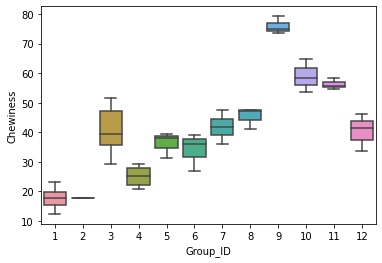

In [ ]:
import seaborn as sns
sns.boxplot(x="Group_ID", y="Chewiness",
           
            data=data)
#plt.title('Chewiness')

In [ ]:
np.abs(data.corr())>0.9 

,Study_ID,target_moisture,fat,protein,carbs,ash,moisture,fiber,Hardness,Chewiness,Group_ID
Study_ID,True,False,False,False,False,False,False,False,False,False,True
target_moisture,False,True,True,False,False,False,False,False,False,False,True
fat,False,True,True,False,False,False,False,False,False,False,False
protein,False,False,False,True,False,False,False,False,False,False,False
carbs,False,False,False,False,True,False,False,False,False,False,False
ash,False,False,False,False,False,True,False,False,False,False,False
moisture,False,False,False,False,False,False,True,False,False,False,False
fiber,False,False,False,False,False,False,False,True,False,False,False
Hardness,False,False,False,False,False,False,False,False,True,True,False
Chewiness,False,False,False,False,False,False,False,False,True,True,False


In [ ]:
data.groupby('Group_ID').count()

,Study_ID,target_moisture,fat,protein,carbs,ash,moisture,fiber,Hardness,Chewiness,Unnamed: 11
Group_ID,,,,,,,,,,,
1,15,15,15,15,15,15,15,15,15,15,15
2,2,2,2,2,2,2,2,2,2,2,2
3,9,9,9,9,9,9,9,9,9,9,9
4,4,4,4,4,4,4,4,4,4,4,4
5,3,3,3,3,3,3,3,3,3,3,3
6,3,3,3,3,3,3,3,3,3,3,3
7,3,3,3,3,3,3,3,3,3,3,3
8,3,3,3,3,3,3,3,3,3,3,3
9,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_features = PCA(n_components=1)
principalComponents = pca_features.fit_transform(X_scaled)

<AxesSubplot:xlabel='Group_ID'>

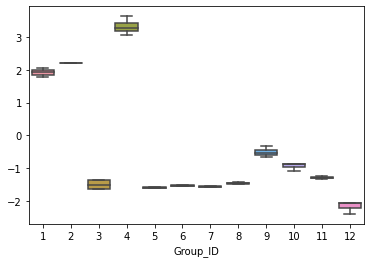

In [ ]:
import seaborn as sns
sns.boxplot(x='Group_ID', y=principalComponents.ravel(),
           
            data=data)

<AxesSubplot:xlabel='Group_ID', ylabel='Hardness'>

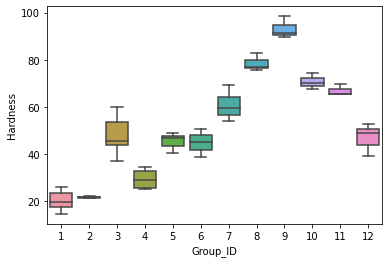

In [ ]:
import seaborn as sns
sns.boxplot(x="Group_ID", y="Hardness",
           
            data=data)

In [ ]:
df = data.loc[:,['Hardness','Chewiness','Group_ID']]

In [ ]:
df['X_PCA'] = pd.Series(principalComponents.ravel(), index=df.index)


In [ ]:
df.head(


,Hardness,Chewiness,Group_ID,X_PCA
0,46.7090,38.049816,5,-1.600718
1,40.4365,31.294988,5,-1.600718
2,49.0595,39.494747,5,-1.578992
3,38.6525,26.862429,6,-1.521923
4,50.8115,38.977081,6,-1.540845


<AxesSubplot:xlabel='Group_ID', ylabel='value'>

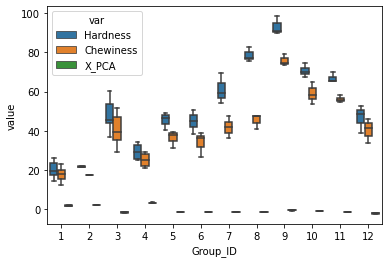

In [ ]:
dd=pd.melt(df,id_vars=['Group_ID'],value_vars=['Hardness','Chewiness','X_PCA'], var_name='var')
sns.boxplot(x='Group_ID',y='value',data=dd,hue='var')

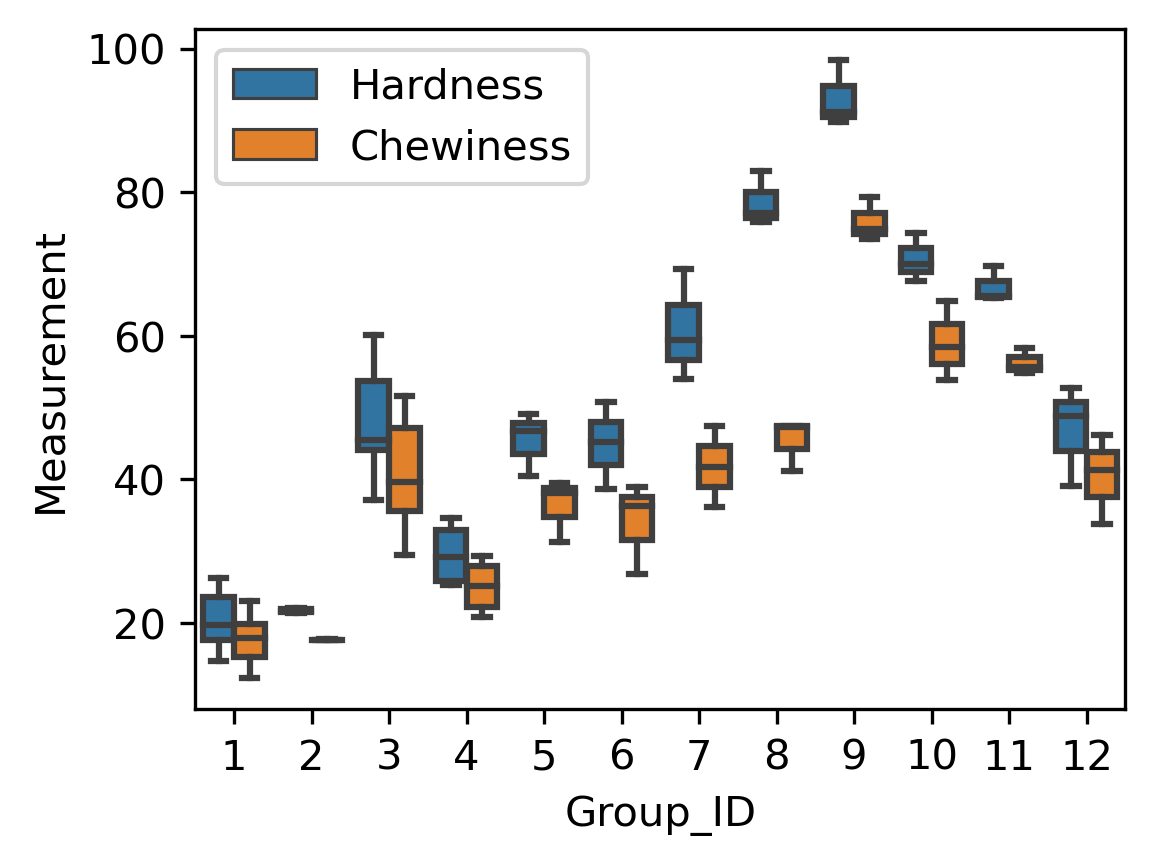

In [19]:
dd=pd.melt(df,id_vars=['Group_ID'],value_vars=['Hardness','Chewiness'], var_name='var')
fig = plt.figure(figsize=(4,3), dpi=300)

sns.boxplot(x='Group_ID',y='value',data=dd,hue='var')
plt.ylabel('Measurement')
plt.legend(title='')
plt.savefig('Variation_Hardness.pdf', bbox_inches='tight')
